<a href="https://colab.research.google.com/github/maoki109/TaxpayersPoliticalParty/blob/main/Datathon1_Taxpayer'sPoliticalParty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mari Aoki

DPhi Machine Learning Bootcamp

Datathon 1 Due December 17, 2020

# Content

A tax is a compulsory financial charge or some other type of levy imposed on a taxpayer (an individual or legal entity) by a governmental organization in order to fund government spending and various public expenditures.

# Objective

You are required to build a machine learning model that would predict the political party to which a taxpayer belongs to.

# Evaluation Criteria


Submissions are evaluated using Accuracy Score.

**How do we do it?** 

Once we release the data, anyone can download it, build a model, and make a submission. We give competitors a set of data (training data) with both the independent and dependent variables. 

We also release another set of data (test dataset) with just the independent variables, and we hide the dependent variable that corresponds with this set. You submit the predicted values of the dependent variable for this set and we compare it against the actual values. 

The predictions are evaluated based on the evaluation metric defined in the datathon.

# About the Data

The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not. Some of the attribute informations are given below:

To load the training data in your jupyter notebook, use the below command:

In [ ]:
import pandas as pd

tax_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv") 

In [ ]:
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
# To split the dataset into train and test set
from sklearn.model_selection import train_test_split   

# Logistic regression model
from sklearn.linear_model import LogisticRegression  

# for model evaluation
from sklearn.metrics import f1_score    

# Accuracy score
from sklearn.metrics import accuracy_score

# Data Description
* HHI: Household income
* HHDL: Household debt level
* Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
* PoliticalParty: Name of the political party
* CollegeGrads: Grade in College out of 5
* AHHAge: Average household age
* cars: number of cars in house
* Filed in YYYY: Tax filed in given year YYYY




In [ ]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
tax_data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

There are no missing values in the dataset.

In [ ]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


Separate input and output variables

In [ ]:
X = tax_data.drop('PoliticalParty', axis = 1)
Y = tax_data['PoliticalParty']

Split into test and train groups

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
309,124,238857,-405651,1,5,37,2,0,1,0
433,861,27895,807147,0,5,43,3,1,0,1
613,112,36210,-426622,1,4,43,2,1,0,1
108,78,46758,-753137,1,0,46,2,1,0,0
800,596,51066,-900262,1,1,67,4,0,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 309 to 37
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     642 non-null    int64
 1   HHI            642 non-null    int64
 2   HHDL           642 non-null    int64
 3   Married        642 non-null    int64
 4   CollegGrads    642 non-null    int64
 5   AHHAge         642 non-null    int64
 6   Cars           642 non-null    int64
 7   Filed in 2017  642 non-null    int64
 8   Filed in 2016  642 non-null    int64
 9   Filed in 2015  642 non-null    int64
dtypes: int64(10)
memory usage: 55.2 KB


# Exploratory Data Analysis (EDA)



Distribution of target variable

<function matplotlib.pyplot.show>

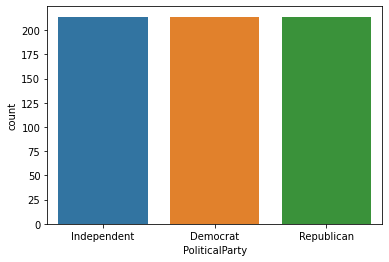

In [ ]:
sns.countplot(y_train)
plt.show

Create boxplots for numerical data to see distribution of data we have.

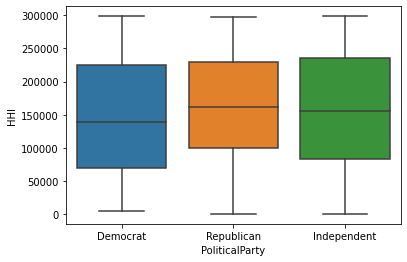

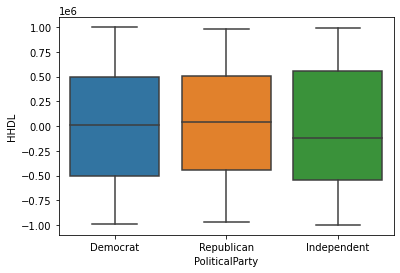

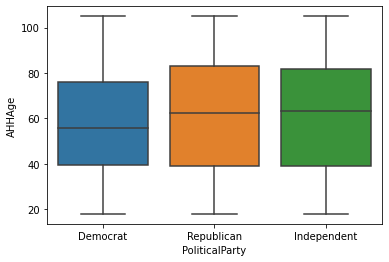

In [ ]:
numeric_data = X_train[['HHI', 'HHDL', 'AHHAge']]
for feature in numeric_data.columns:
  sns.boxplot(x=Y, y=feature, data=numeric_data)
  plt.show()

Correlation analysis between the continuous variables visualized using a heatmap

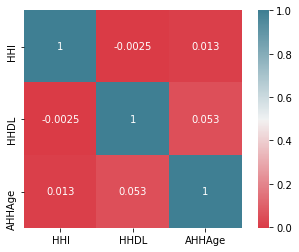

In [ ]:
colormap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(numeric_data.corr(), cmap = colormap, square = True, annot = True)
plt.show()

Exploratory Data Analysis (EDA) on Categorical data

In [ ]:
categorical_data = tax_data.drop(numeric_data.columns, axis=1) #drop numerical colums from tax_data
categorical_data.nunique() #return number of unique values in each column/feature

Unnamed: 0        803
Married             3
CollegGrads         6
Cars                6
Filed in 2017       2
Filed in 2016       2
Filed in 2015       2
PoliticalParty      3
dtype: int64

Machine learning models only accept numerical data. The columns Married, CollegeGrads, Cars, Filed in 2017, Filed in 2016, and Filed in 2015 are already split into numbered categories. The only categorical column that is not represented as a number is PoliticalParty (the dependent variable). We will pre-process this variable by creating dummies.

In [ ]:
pParty = y_train.str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
pParty.head()

,Democrat,Independent,Republican
309,0,1,0
433,1,0,0
613,0,0,1
108,0,1,0
800,1,0,0


We probably don't need to do one hot encoding on categorical variables because these variables are categorized by numbers already.

In [ ]:
X_train.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
309,124,238857,-405651,1,5,37,2,0,1,0
433,861,27895,807147,0,5,43,3,1,0,1
613,112,36210,-426622,1,4,43,2,1,0,1
108,78,46758,-753137,1,0,46,2,1,0,0
800,596,51066,-900262,1,1,67,4,0,0,0


We will create another train that drops column 'Unnamed: 0' because we are not sure what it is and whether it has useful information in terms of determining the person's political party. We will see if it has useful information later.

In [ ]:
X_train2 = X_train.drop(['Unnamed: 0'], axis = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 309 to 37
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     642 non-null    int64
 1   HHI            642 non-null    int64
 2   HHDL           642 non-null    int64
 3   Married        642 non-null    int64
 4   CollegGrads    642 non-null    int64
 5   AHHAge         642 non-null    int64
 6   Cars           642 non-null    int64
 7   Filed in 2017  642 non-null    int64
 8   Filed in 2016  642 non-null    int64
 9   Filed in 2015  642 non-null    int64
dtypes: int64(10)
memory usage: 55.2 KB


In [ ]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 309 to 37
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHI            642 non-null    int64
 1   HHDL           642 non-null    int64
 2   Married        642 non-null    int64
 3   CollegGrads    642 non-null    int64
 4   AHHAge         642 non-null    int64
 5   Cars           642 non-null    int64
 6   Filed in 2017  642 non-null    int64
 7   Filed in 2016  642 non-null    int64
 8   Filed in 2015  642 non-null    int64
dtypes: int64(9)
memory usage: 50.2 KB


# Testing Models

We need to preprocess and clean the test data the same way that the train data was.

In [ ]:
X_test.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
8,261,153930,494379,1,2,40,0,0,1,1
790,434,267461,-290422,1,1,98,0,1,1,1
571,39,153052,-606726,1,2,75,2,1,0,1
224,797,75698,-100753,2,3,39,1,0,0,1
498,996,275991,274256,1,0,81,1,1,0,0


One hot encoding for categorical variable in y_test

In [ ]:
pParty = y_test.str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
pParty.head()

,Democrat,Independent,Republican
8,0,1,0
790,0,1,0
571,1,0,0
224,0,0,1
498,1,0,0


Drop column 'Unnamed: 0' for another test.

In [ ]:
X_test2 = X_test.drop(['Unnamed: 0'], axis = 1)

# Model Building

### 1. Logistic Regression Model

With column 'Unnamed: 0'

In [ ]:
model1 = LogisticRegression()   
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Without column 'Unnamed: 0'

In [ ]:
model2 = LogisticRegression()   
model2.fit(X_train2,y_train)

###Model Evaluation

In [ ]:
test_Xdata = X_test.copy()
test_Xdata.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
8,261,153930,494379,1,2,40,0,0,1,1
790,434,267461,-290422,1,1,98,0,1,1,1
571,39,153052,-606726,1,2,75,2,1,0,1
224,797,75698,-100753,2,3,39,1,0,0,1
498,996,275991,274256,1,0,81,1,1,0,0


In [ ]:
y_test.head()

8      Independent
790    Independent
571       Democrat
224     Republican
498       Democrat
Name: PoliticalParty, dtype: object

With column 'Unnamed: 0'

In [ ]:
accuracy_score(y_test, model1.predict(test_Xdata))

0.35403726708074534

In [ ]:
f1_score(y_test, model1.predict(test_Xdata), average='micro')

0.3540372670807454

In [ ]:
f1_score(y_test, model1.predict(test_Xdata), average='macro')

0.35629973169589313

In [ ]:
f1_score(y_test, model1.predict(test_Xdata), average='weighted')

0.3581203742740637

Without column 'Unnamed: 0'

In [ ]:
accuracy_score(y_test, model2.predict(X_test2))

0.2795031055900621

We observe that the logistic regression model with column "Unnamed: 0" has a better accuracy score.




### 2. Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

With column 'Unnamed: 0'

In [ ]:
forest1 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Without column 'Unnamed: 0'

In [ ]:
forest2 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
forest2.fit(X_train2, y_train)

###Model Evaluation

With column 'Unnamed: 0'

In [ ]:
accuracy_score(y_test, forest1.predict(test_Xdata))

0.36645962732919257

Without column 'Unnamed: 0'

In [ ]:
accuracy_score(y_test, forest2.predict(X_test2))

0.38509316770186336

We observe that the random forest model does better without the column "Unnamed: 0"

In [ ]:
print("Logistic Regression: ", accuracy_score(y_test, model1.predict(test_Xdata)))
print("Logistic Regression without 'Unnamed: 0':", accuracy_score(y_test, model2.predict(X_test2)))
print("Random Forest: ", accuracy_score(y_test, forest1.predict(test_Xdata)))
print("Random Forest without 'Unnamed: 0': ", accuracy_score(y_test, forest2.predict(X_test2)))

Logistic Regression:  0.35403726708074534
Logistic Regression without 'Unnamed: 0': 0.2795031055900621
Random Forest:  0.36645962732919257
Random Forest without 'Unnamed: 0':  0.38509316770186336


### 3. Random Forest and Boruta

In [ ]:
# install Boruta
!pip install Boruta

     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	8
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=40, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FE83BC94258,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='au

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False False False False False False False False False False]
Ranking:  [ 3  2  2  7  6  4  5  8  9 10]
No. of significant features:  0


Hmm... Boruta says there are 0 significant features. Maybe I did something wrong? Boruta doesn't work well with this data?

# Test Dataset
Load the test data (name it as test_data). You can load the data using the below command.

Here the target column is deliberately not there as you need to predict it

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [ ]:
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


Check for missing values

In [ ]:
test_data.isnull().sum()

Unnamed: 0       0
HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

No missing values to fill.

**Note:** Test data does not contain PoliticalParty column because that is what we're predicting, so we don't have to convert that into a numerical categorical variable through one hot encoding.

In our models with training data, we found that the Random Forest model without the "Unnamed: 0" column gave us the best accuracy score, so we will drop "Unnamed: 0" from test_data and run a Random Forest model.

In [ ]:
test_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHI            201 non-null    int64
 1   HHDL           201 non-null    int64
 2   Married        201 non-null    int64
 3   CollegGrads    201 non-null    int64
 4   AHHAge         201 non-null    int64
 5   Cars           201 non-null    int64
 6   Filed in 2017  201 non-null    int64
 7   Filed in 2016  201 non-null    int64
 8   Filed in 2015  201 non-null    int64
dtypes: int64(9)
memory usage: 14.3 KB


We will use a Random Forest model using all the independent and dependent features given to us at the beginning. So we must remove "Unnamed: 0" from that data as well.

In [ ]:
newX = X.drop(['Unnamed: 0'], axis = 1)

In [ ]:
RForest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
RForest.fit(newX,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
target = RForest.predict(test_data)
print(target)

['Republican' 'Democrat' 'Democrat' 'Republican' 'Republican' 'Democrat'
 'Independent' 'Republican' 'Republican' 'Republican' 'Democrat'
 'Republican' 'Democrat' 'Republican' 'Democrat' 'Republican'
 'Independent' 'Democrat' 'Republican' 'Democrat' 'Democrat' 'Republican'
 'Democrat' 'Democrat' 'Republican' 'Democrat' 'Democrat' 'Republican'
 'Republican' 'Democrat' 'Independent' 'Republican' 'Democrat'
 'Independent' 'Democrat' 'Republican' 'Republican' 'Independent'
 'Independent' 'Independent' 'Republican' 'Independent' 'Democrat'
 'Democrat' 'Democrat' 'Democrat' 'Democrat' 'Democrat' 'Democrat'
 'Democrat' 'Independent' 'Independent' 'Republican' 'Democrat' 'Democrat'
 'Democrat' 'Republican' 'Democrat' 'Democrat' 'Democrat' 'Democrat'
 'Democrat' 'Republican' 'Democrat' 'Independent' 'Democrat' 'Republican'
 'Independent' 'Democrat' 'Independent' 'Republican' 'Independent'
 'Democrat' 'Democrat' 'Independent' 'Democrat' 'Democrat' 'Independent'
 'Democrat' 'Republican' 'Republic

### Save predication results

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
# res.to_csv('prediction_results.csv', inplace = False)
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>